In [292]:
using Statistics
using Plots
using RDatasets

iris = dataset("datasets", "iris")
sepals = iris[!, [:SepalLength, :SepalWidth]];
sepalLengths = [x[1] for x in eachrow(sepals)];
sepalWidths = [y[2] for y in eachrow(sepals)];
irisSepals = [sepalLengths sepalWidths];


function newCentroids(data, centroids, centroidList)
    
    newCentroids = []
    
    for centroid in centroids
        locations = findall(==(centroid), centroidList)
        centroidPoints = data[findall(==(centroid), centroidList),:]
        x = mean(centroidPoints[:,1])
        y = mean(centroidPoints[:,2])
        append!(newCentroids, [[x,y]])
       
    end
    return(newCentroids)
    
    
end
        

function initialPoints(x,k)
    centroids = []
    
    minx = minimum(x[:,1])
    maxx = maximum(x[:,1])
    miny = minimum(x[:,2])
    maxy = maximum(x[:,2])
    
    for i in 1:k
        append!(centroids,     [    [ minx+(i/k-1/(2*k))*(maxx-minx)   , miny+(i/k-1/(2*k))*(maxy-miny)] ]   )
    end
    
    return(centroids)
end



function kmeans(x, k, iterates, centroids=0)
    
    minx = minimum(x[:,1])
    maxx = maximum(x[:,1])
    miny = minimum(x[:,2])
    maxy = maximum(x[:,2])
 
    if centroids == 0
    
        centroids = initialPoints(x,k)
    end
        
    centroidList = [[0.0,0.0] for x in 1:150]   ## initialize array for storing which centroid for each point
    
    for iter in 1:iterates
    
        for i in 1:size(x)[1]    
            xval = x[i,1]
            yval = x[i,2]
        
            distance = ((maxx-minx)^2+(maxy-miny)^2)
        
            for centroid in centroids
                d = ((xval-centroid[1])^2 + (yval - centroid[2])^2)
                if d<distance
                    distance = d
                    centroidList[i, :] = [[centroid[1], centroid[2]]]   
                end
            end
        
        end
        
        if iter != iterates    
            centroids = newCentroids(x,centroids, centroidList)
        end
        
    end
    
   
    
    return([centroids, centroidList])
    

end


function plotKmeans(x, k, iter)
    
    results = kmeans(x, k, iter);

    p =plot()
    theme(:dark, bg = false)

    i=0

    for centroid in results[1]
        centroidPoints = irisSepals[findall(==(centroid), results[2]),:]
        p=plot!(centroidPoints[:,1], centroidPoints[:,2], 
                      seriestype = :scatter, 
                      legend=false,
                      xlabel = "Sepal Length",
                      ylabel = "Sepal Width",
                      title = "k-means Clustering of Iris Dataset")



    end

    display(p)
    
end


plotKmeans (generic function with 2 methods)

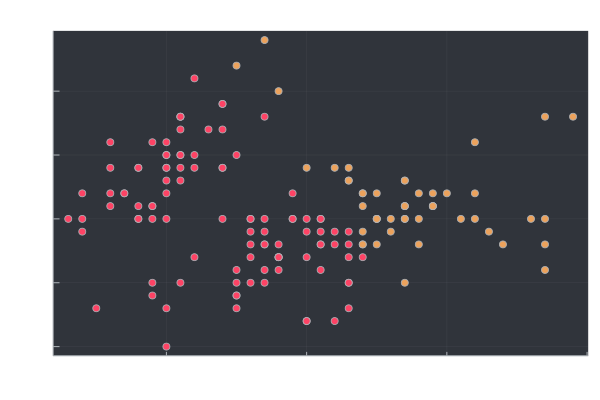

In [294]:
plotKmeans(irisSepals, 2,1)


2-element Array{Float64,1}:
 NaN
 NaN

In [ ]:
zeros()